In [71]:
#Import libraries
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
#Import dataset
lc_data = pd.read_csv('C:\Users\Matt\Downloads\lending-club-loan-data\loan.csv')


C:\Users\Matt\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
lc_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#Deal with NaN values
lc_data.isnull().any()
lc_data = lc_data.fillna(method='ffill')

In [4]:
lc_data.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [5]:
print lc_data.corr()

                                   id  member_id  loan_amnt  funded_amnt  \
id                           1.000000   0.999443   0.063803     0.066058   
member_id                    0.999443   1.000000   0.064461     0.066754   
loan_amnt                    0.063803   0.064461   1.000000     0.999263   
funded_amnt                  0.066058   0.066754   0.999263     1.000000   
funded_amnt_inv              0.071502   0.072308   0.997115     0.998025   
int_rate                    -0.142963  -0.142205   0.145023     0.145160   
installment                  0.025347   0.026036   0.944977     0.946005   
annual_inc                   0.033990   0.034146   0.332698     0.332466   
dti                          0.067781   0.067824   0.020675     0.021075   
delinq_2yrs                  0.049648   0.049904  -0.000159     0.000151   
inq_last_6mths              -0.126950  -0.127257  -0.034168    -0.034711   
mths_since_last_delinq      -0.008540  -0.008682  -0.038080    -0.038117   
mths_since_l

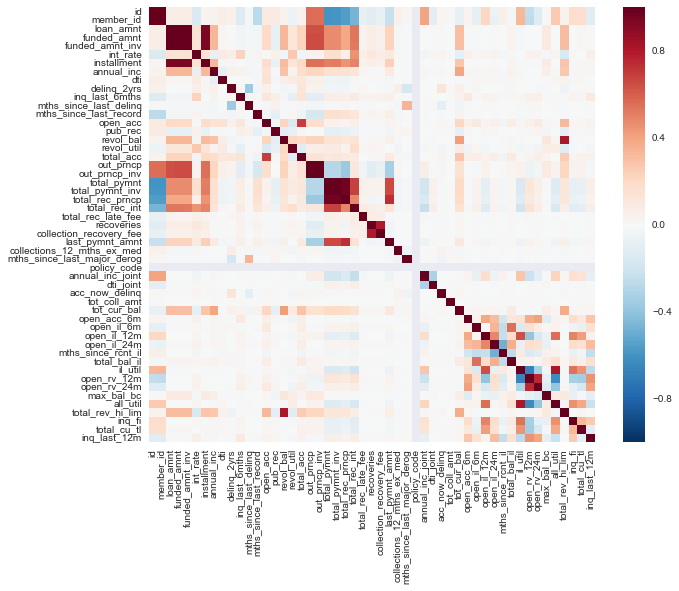

In [5]:
sns.heatmap(lc_data.corr())

In [7]:
lc_data['grade'].value_counts().sort_index()

A    148202
B    254535
C    245860
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

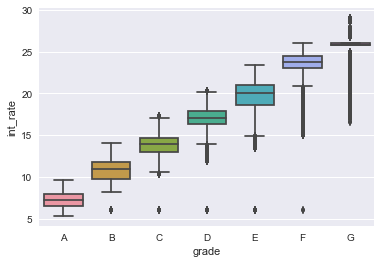

In [60]:
sns.boxplot(x='grade', y='int_rate', data=lc_data, order= 'ABCDEFG')

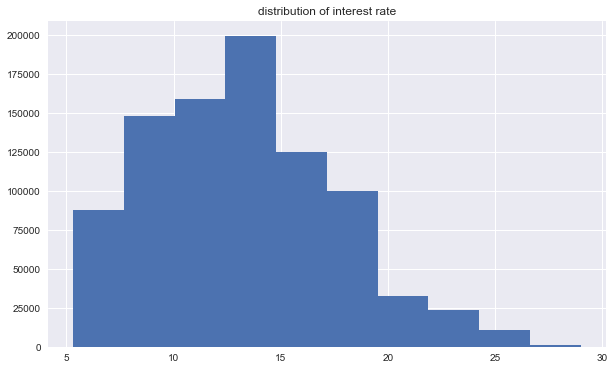

In [6]:
plt.rc("figure", figsize=(10, 6))
lc_data["int_rate"].hist()
plt.title("distribution of interest rate")

In [9]:
print lc_data['int_rate'].mean()
print lc_data['int_rate'].median()

13.2467396795
12.99


In [7]:
grade_by_purpose = lc_data.groupby(['purpose', 'grade'])
grade_by_purpose.mean()

id  member_id     loan_amnt   funded_amnt  \
purpose            grade                                                    
car                A      21978189   23726272   7908.216857   7884.063956   
                   B      26624574   28731134   8262.555597   8252.603781   
                   C      30321083   32657181   8981.930693   8975.306459   
                   D      27188786   29384620   9821.200387   9821.200387   
                   E      31936859   34341282  12778.485839  12776.742919   
                   F      30305854   32752790  14216.352201  14216.352201   
                   G      34092321   36653029  13738.281250  13738.281250   
credit_card        A      36294922   39062611  14872.057329  14865.325150   
                   B      33103816   35711592  14297.782721  14292.366221   
                   C      33503929   36130239  15699.766761  15693.390261   
                   D      31158254   33638687  17003.886308  16995.501892   
                   E      33054886   35609757  19491.866567  19465.395427   
                   F      27432744   29642863  21266.137708  21221.611081   
                   G      20563143   22287630  21595.668693  21524.848024   
debt_consolidation A      33202554   35769960  14491.485886  14476.719395   
                   B      31358479   33842657  14027.822681  14015.862724   
                   C      33358450   35964183  15025.499544  15019.035999   
                   D      32372768   34909415  16333.719865  16325.709531   
                   E      34617784   37255571  18936.976847  18914.414822   
                   F      31349474   33783274  20252.459771  20209.936247   
                   G      30223043   32611084  21306.998768  21267.146597   
educational        A        408675     483194   5947.727273   5914.488636   
                   B        420738     495980   6883.928571   6815.178571   
                   C        399460     466501   7391.086957   7292.173913   
                   D        412834     481435   5974.519231   5779.807692   
                   E        330539     360222   5759.459459   5718.918919   
                   F        288124     331735   9186.363636   8277.272727   
                   G        358132     391889   3675.000000   3675.000000   
home_improvement   A      32377895   34852737  12677.220781  12654.471504   
                   B      32685720   35226208  12799.867049  12777.700463   
...                            ...        ...           ...           ...   
other              F      24768988   26937114  13667.402945  13650.022311   
                   G      26747042   28995224  17241.088328  17231.782334   
renewable_energy   A       8664631    9390736   8979.661017   8755.084746   
                   B      15785685   17038568   9516.935484   9516.935484   
                   C      32403185   34898029   9085.416667   9049.826389   
                   D      32839028   35226641   9353.125000   9353.125000   
                   E      33478164   36054479  12076.785714  12076.785714   
                   F      26827834   29020715  10339.634146  10264.634146   
                   G      19019898   20984590  21187.500000  21187.500000   
small_business     A       6725471    7349358  12672.294887  12488.644471   
                   B      14182267   15394802  14117.719595  13945.489865   
                   C      27319656   29477612  14319.194516  14245.769066   
                   D      25956158   28051760  14988.553042  14935.969189   
                   E      28245024   30480234  17201.338067  17058.219552   
                   F      24422434   26432653  18132.112069  18074.110991   
                   G      24546891   26617645  20782.644110  20697.431078   
vacation           A      23067590   24779366   6391.778523   6361.073826   
                   B      32972067   35434078   6330.115346   6326.354062   
                   C      37838260   40656022   5784.780534   5779.246183   
                   D      30

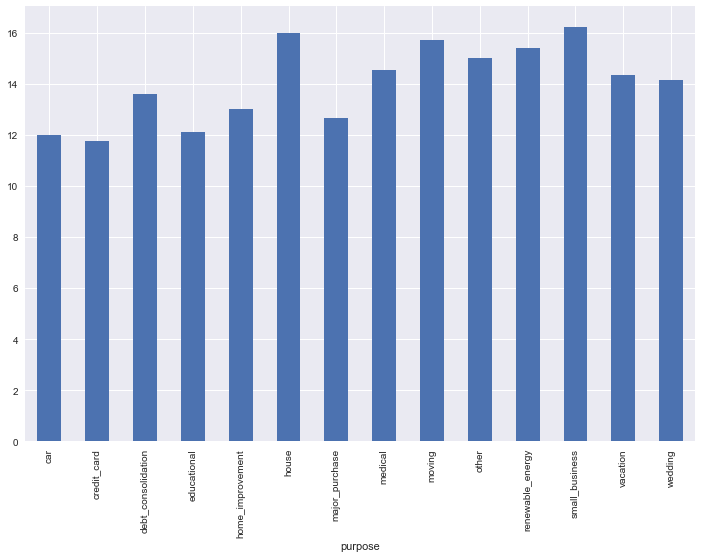

In [8]:
purpose_group = lc_data.groupby('purpose')
purpose_group.mean()['int_rate'].plot(kind='bar',figsize=(12,8))

In [9]:
print purpose_group.mean()['int_rate']

purpose
car                   12.005558
credit_card           11.773691
debt_consolidation    13.601379
educational           12.120142
home_improvement      13.027068
house                 16.008460
major_purchase        12.673565
medical               14.562644
moving                15.729104
other                 15.021655
renewable_energy      15.392365
small_business        16.233037
vacation              14.340332
wedding               14.151657
Name: int_rate, dtype: float64


In [10]:
print purpose_group.mean()['inq_last_6mths']

purpose
car                   0.759337
credit_card           0.619758
debt_consolidation    0.683693
educational           1.806147
home_improvement      0.853750
house                 1.094686
major_purchase        0.815535
medical               0.771194
moving                0.796084
other                 0.757146
renewable_energy      0.822609
small_business        1.007998
vacation              0.781039
wedding               0.982105
Name: inq_last_6mths, dtype: float64


In [108]:
#LinReg Model
feature_cols = ['inq_last_6mths']
X = lc_data[feature_cols]
y = lc_data['int_rate']
linreg = LinearRegression()
linreg.fit(X, y)
outcome_pred = linreg.predict(X)
print("The y intercept: {}".format(linreg.intercept_))
print("The single coefficient: {}".format(linreg.coef_))

The y intercept: 12.5527566026
The single coefficient: [ 0.99909149]


R^2: 0.0518250752773


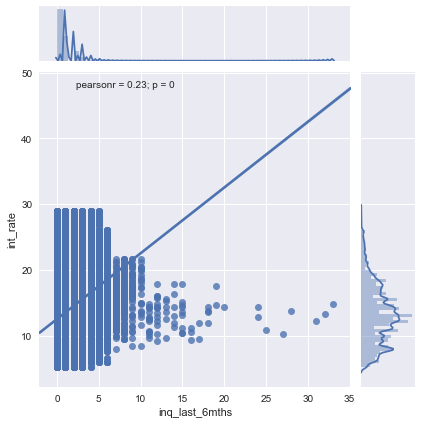

In [76]:
X.values.flatten()
sns.jointplot('inq_last_6mths', 'int_rate', lc_data, kind="reg")
print("R^2: {}".format(stats.pearsonr(X.values.flatten(),y.values)[0] ** 2))

In [90]:
mult_feature_cols = ['inq_last_6mths', 'delinq_2yrs', 'revol_util', 'total_rec_int']
X_mult = lc_data[mult_feature_cols]
Y_mult = lc_data['int_rate']


multiple_linreg = LinearRegression()
multiple_linreg.fit(X_mult, Y_mult)

coeffs = multiple_linreg.coef_
intercept =  multiple_linreg.intercept_
# print the coefficients like last time
print(intercept)
print(coeffs)

8.88902967612
[  9.32239201e-01   2.73212497e-01   3.99900314e-02   8.10399048e-04]


In [87]:
list(zip(mult_feature_cols, multiple_linreg.coef_))

[('inq_last_6mths', 0.93223920055522602),
 ('delinq_2yrs', 0.27321249671650855),
 ('revol_util', 0.039990031426078036),
 ('total_rec_int', 0.00081039904818658304)]

In [88]:
# R squared
Y_mult_pred = multiple_linreg.predict(X_mult)
metrics.r2_score(Y_mult, Y_mult_pred)

0.28254983459735206

In [91]:
#Test Eval Model
feature_cols = ['inq_last_6mths', 'delinq_2yrs', 'revol_util', 'total_rec_int']
X = lc_data[feature_cols]
Y = lc_data['int_rate']

lr = LinearRegression()
lr.fit(X, y)
print(metrics.mean_absolute_error(y, lr.predict(X)))
print(metrics.mean_squared_error(y, lr.predict(X)))
print(np.sqrt(metrics.mean_squared_error(y, lr.predict(X))))
print()

2.94813833894
13.7755743776
3.71154608992
()


In [92]:
#Test train split
mult_feature_cols = ['inq_last_6mths', 'delinq_2yrs', 'revol_util', 'total_rec_int']
X_mult = lc_data[mult_feature_cols]
Y_mult = lc_data['int_rate']

X_mult

,inq_last_6mths,delinq_2yrs,revol_util,total_rec_int
0,1.0,0.0,83.70,861.07
1,5.0,0.0,9.40,435.17
2,2.0,0.0,98.50,603.65
3,1.0,0.0,21.00,2209.33
4,0.0,0.0,53.90,1009.07
5,3.0,0.0,28.30,631.38
6,1.0,0.0,85.60,3025.99
7,2.0,0.0,87.50,938.14
8,2.0,0.0,32.60,294.94
9,0.0,0.0,36.50,533.42


In [104]:
X_mult_train, X_mult_test, Y_mult_train, Y_mult_test = (
    train_test_split(X_mult, Y_mult, test_size=0.01, random_state=1))
print("training data size: {}".format(X_mult_train.shape))
print("testing data size: {}".format(X_mult_test.shape))

training data size: (878505, 4)
testing data size: (8874, 4)


In [107]:
#train on training set
mult_linreg2 = LinearRegression()
mult_linreg2.fit(X_mult_train, Y_mult_train)

Y_mult_pred_train = mult_linreg2.predict(X_mult_train)
print("Training set RMSE: {}".format(np.sqrt(metrics.mean_squared_error(Y_mult_train, Y_mult_pred_train))))

Y_mult_pred_test = mult_linreg2.predict(X_mult_test)
print("Test set RMSE: {}".format(np.sqrt(metrics.mean_squared_error(Y_mult_test, Y_mult_pred_test))))

Training set RMSE: 3.71140191709
Test set RMSE: 3.72580802297


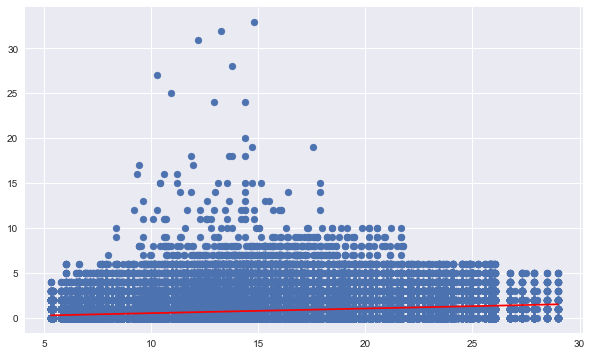

In [14]:
plt.scatter(lc_data.int_rate, lc_data.inq_last_6mths)
plt.plot(lc_data.int_rate, outcome_pred, color='red')

In [27]:
print lc_data['funded_amnt'].mean()
print lc_data['funded_amnt'].median()


14741.877625
13000.0


In [69]:
feature_cols = ['int_rate']
X = lc_data[feature_cols]
y = lc_data['inq_last_6mths']
linreg = LinearRegression()
linreg.fit(X, y)
outcome_pred = linreg.predict(X)
print("The y intercept: {}".format(linreg.intercept_))
print("The single coefficient: {}".format(linreg.coef_))

The y intercept: 0.007476588343
The single coefficient: [ 0.0518722]


(array([ 39536.,  48272.,  71429.,  76392.,  68158.,  91157.,  99883.,
         99431.,  66746.,  58293.,  58194.,  41673.,  18393.,  14167.,
         13882.,   9582.,   5883.,   5023.,    807.,    478.]),
 array([  5.32  ,   6.5035,   7.687 ,   8.8705,  10.054 ,  11.2375,
         12.421 ,  13.6045,  14.788 ,  15.9715,  17.155 ,  18.3385,
         19.522 ,  20.7055,  21.889 ,  23.0725,  24.256 ,  25.4395,
         26.623 ,  27.8065,  28.99  ]),
 <a list of 20 Patch objects>)

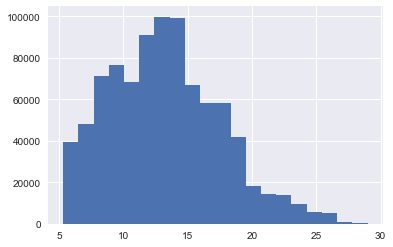

In [77]:
plt.hist(lc_data['int_rate'], bins = 20)

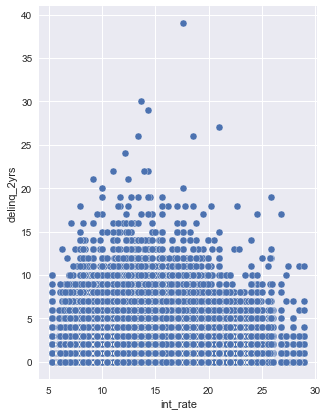

In [32]:
sns.pairplot(lc_data, x_vars=['int_rate'], y_vars='delinq_2yrs', size=6, aspect=0.8)